In [1]:
import sys
sys.path.append("../main/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mobility

In [2]:
mobility = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv",low_memory=False)
#mobility = data#[data["state"] != "TOTAL"]

In [3]:
mobility = mobility[mobility.country_region == 'Brazil']

In [4]:
mobility.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [37]:
mobility.sub_region_1.unique()#.filter(['date','retail_and_recreation_percent_change_from_baseline'])

array([nan, 'Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [41]:
mobility[mobility['sub_region_1'].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
657213,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
657214,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
657215,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
657216,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
657217,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657854,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2021-11-17,-1.0,39.0,-2.0,9.0,22.0,3.0
657855,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2021-11-18,-6.0,38.0,-8.0,7.0,22.0,3.0
657856,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2021-11-19,0.0,44.0,-10.0,9.0,25.0,3.0
657857,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2021-11-20,3.0,43.0,-12.0,4.0,16.0,4.0


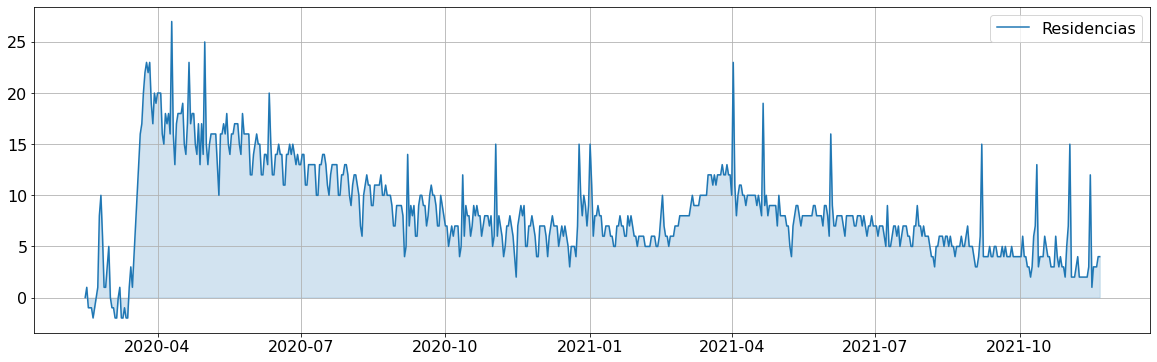

In [52]:
l1 = ['grocery_and_pharmacy_percent_change_from_baseline',       'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',     'workplaces_percent_change_from_baseline',
      'residential_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baseline']

l2 = ['Supermercados e drogarias','Parques','Transito e estações','Local de trabalho','Residencias',
      'Varejo e recreação']

s = l1[4]
lab = l2[4]

fig, ax1 = plt.subplots(nrows=1, figsize=(20,6), sharex=True, sharey=False)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)
    
plt.subplots_adjust(wspace=1.5)

langs = pd.to_datetime(mobility[mobility['sub_region_1'].isnull()]['date'])

ax1.plot(langs,mobility[mobility['sub_region_1'].isnull()][s],label=lab,color='C0')
ax1.legend()
ax1.grid()
ax1.fill_between(langs, mobility[mobility['sub_region_1'].isnull()][s], color = 'C0',alpha=0.2)


In [53]:
# Unifyied mobility

In [56]:
uni = (mobility[mobility['sub_region_1'].isnull()]['grocery_and_pharmacy_percent_change_from_baseline']+
mobility[mobility['sub_region_1'].isnull()]['parks_percent_change_from_baseline']+
mobility[mobility['sub_region_1'].isnull()]['transit_stations_percent_change_from_baseline']+
mobility[mobility['sub_region_1'].isnull()]['workplaces_percent_change_from_baseline']+
mobility[mobility['sub_region_1'].isnull()]['retail_and_recreation_percent_change_from_baseline']+
(100 - mobility[mobility['sub_region_1'].isnull()]['residential_percent_change_from_baseline']))/6

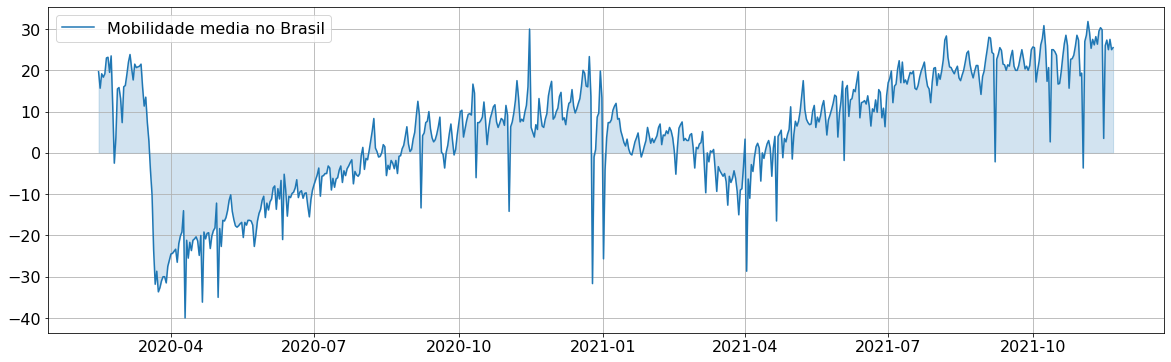

In [57]:
fig, ax1 = plt.subplots(nrows=1, figsize=(20,6), sharex=True, sharey=False)

lab = 'Mobilidade media no Brasil'
# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)
    
plt.subplots_adjust(wspace=1.5)

langs = pd.to_datetime(mobility[mobility['sub_region_1'].isnull()]['date'])

ax1.plot(langs,uni,label=lab,color='C0')
ax1.legend()
ax1.grid()
ax1.fill_between(langs, uni, color = 'C0',alpha=0.2)

In [59]:
mobility[mobility['sub_region_1'].isnull()]['mobilidade_unificada'] = uni

<ipython-input-59-ddcee6f210d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobility[mobility['sub_region_1'].isnull()]['mobilidade_unificada'] = uni


In [60]:
mobility[mobility['sub_region_1'].isnull()].to_excel('/Users/julianeoliveira/Downloads/dados_google_mobility.xlsx')